In [1]:
# IMPORT SECTION
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# ACQUIRE DATA
# esb (business indicator)
print("{} ESB {}".format('='*5, '='*5))
filename = "./training_data/2020_05_04/esb.csv"
print("opening {}".format(filename))
esb_df = pd.read_csv(filename, header=0)
print(esb_df.info())


===== ESB =====
opening ./training_data/2020_05_04/esb.csv


In [3]:
# host KPI
print("{} host {}".format('='*5, '='*5))
host_df_lst = []
for s_name in ["db_oracle_11g", "dcos_container", "dcos_docker", "mw_redis", "os_linux"]:
    filename = "./training_data/2020_05_04/host/" + s_name + ".csv"
    print("opening {}".format(filename))
    temp_df = pd.read_csv(filename, header=0)
    temp_df.rename(columns={'itemid': 'item_id'}) # rename columns so that is follows convention some_special_name
    host_df_lst.append(temp_df)

host_df = pd.concat(host_df_lst) 
print(host_df.info())


===== host =====
opening ./training_data/2020_05_04/host/db_oracle_11g.csv
opening ./training_data/2020_05_04/host/dcos_container.csv
opening ./training_data/2020_05_04/host/dcos_docker.csv
opening ./training_data/2020_05_04/host/mw_redis.csv
opening ./training_data/2020_05_04/host/os_linux.csv


In [ ]:
# trace
print("{} trace {}".format('='*5, '='*5))
trace_df_lst = []
for c_type in ["csf", "fly_remote", "jdbc", "local", "osb", "remote_process"]:
    filename = "./training_data/2020_05_04/trace/trace_" + c_type + ".csv"
    print("opening {}".format(filename))
    temp_df = pd.read_csv(filename, header=0)
    temp_df.rename(columns={
    'callType': 'call_type', 
    'startTime': 'start_time', 
    'elapsedTime': 'elapsed_time', 
    'traceId':'trace_id', 
    'serviceName': 'service_name', 
    'dsName': 'ds_name'}) # rename columns so that is follows convention some_special_name except for Id
    trace_df_lst.append(temp_df)

trace_df = pd.concat(trace_df_lst)
print(trace_df.info())

In [ ]:
print(ebs_df.info())
print(host_df.info())
print(trace_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387373 entries, 0 to 1214607
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   itemid     int64  
 1   name       object 
 2   bomc_id    object 
 3   timestamp  int64  
 4   value      float64
 5   cmdb_id    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 127.5+ MB


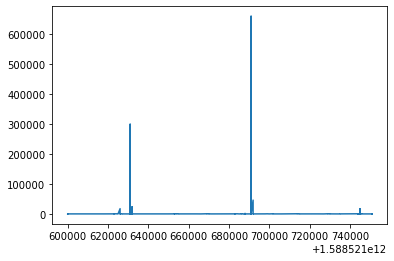

In [4]:
# VISUALIZE DATA
host_df.info()

plt.plot(host_df['timestamp'][:1000], host_df['value'][:1000])
plt.show()
